In [5]:
import torch
import torch.nn as nn


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [6]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer1 = nn.Linear(1, 20)
        self.hidden_layer2 = nn.Linear(20, 20)
        self.hidden_layer3 = nn.Linear(20, 30)
        self.output_layer = nn.Linear(30, 1)

    def forward(self, x):
        layer1_out = torch.sigmoid(self.hidden_layer1(x))
        layer2_out = torch.sigmoid(self.hidden_layer2(layer1_out))
        layer3_out = torch.sigmoid(self.hidden_layer3(layer2_out))
        output = self.output_layer(layer3_out)
        return output

In [7]:
N = Network()
N = N.to(device)

Example Function and BC
$$
\begin{gathered}
\left\{\begin{array}{l}
f(x)=e^x \\
p(x)=0
\end{array} .\right. \\
y(0)=1
\end{gathered}
$$

Exact Solution
$$
y=e^x
$$

In [8]:
def f(x):
    return torch.exp(x)

def loss(x):
    x.requires_grad = True
    y = N(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]

    return torch.mean( (dy_dx - f(x))**2 ) + (y[0, 0] - 1.)**2

In [9]:
optimizer = torch.optim.LBFGS(N.parameters())

x = torch.linspace(0, 1, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()

    return l

epochs = 10
for i in range(epochs):
    optimizer.step(closure)

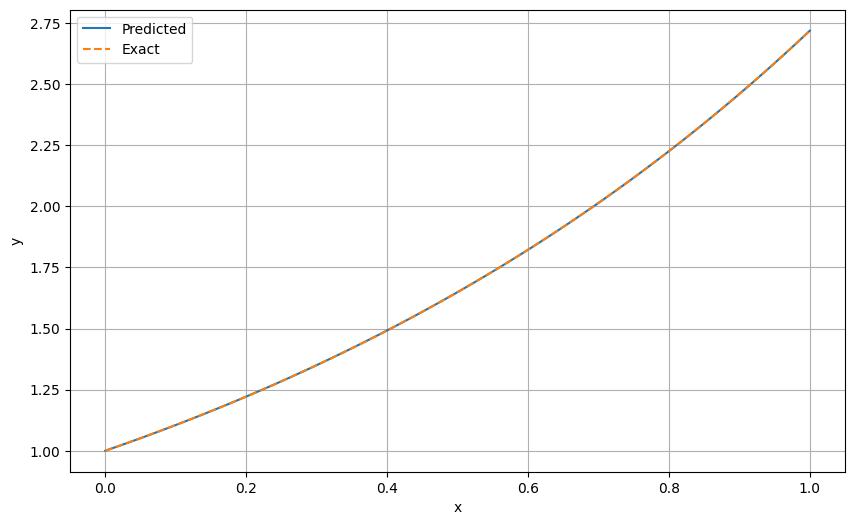

In [10]:
import matplotlib.pyplot as plt

xx = torch.linspace(0, 1, 100)[:, None]
with torch.no_grad():
    yy = N(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy, label="Predicted")
plt.plot(xx, torch.exp(xx), '--', label="Exact")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

Example periodic solution

$$
\begin{gathered}
\left\{\begin{array}{l}
f(x)=cos(x) \\
p(x)=0
\end{array} .\right. \\
y(0)=0
\end{gathered}
$$

Exact Solution
$$
y=sin(x)
$$

In [11]:
N = Network()
N = N.to(device)

In [12]:
def f(x):
    return torch.cos(x)

def loss(x):
    x.requires_grad = True
    y = N(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]

    return torch.mean( (dy_dx - f(x))**2 ) + (y[0, 0])**2

In [13]:
optimizer = torch.optim.LBFGS(N.parameters())

x = torch.linspace(0, 2*torch.pi, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()

    return l

epochs = 40
for i in range(epochs):
    optimizer.step(closure)

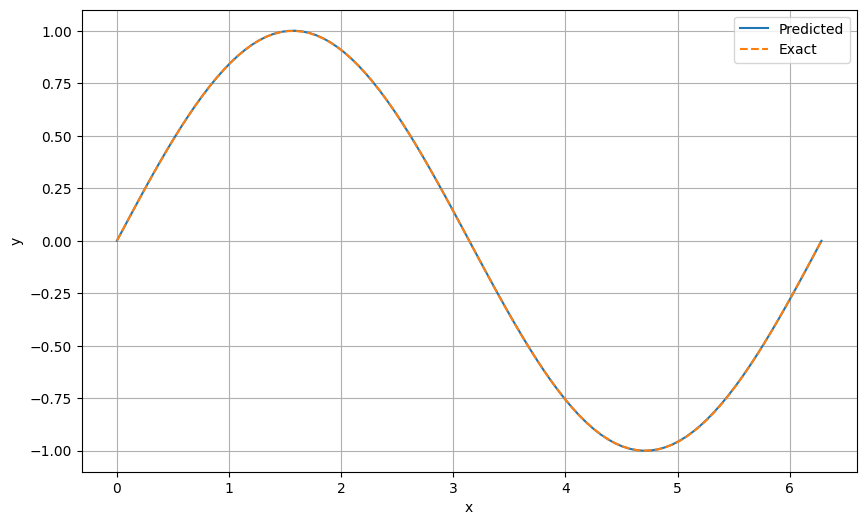

In [14]:
import matplotlib.pyplot as plt

xx = torch.linspace(0, 2*torch.pi, 100)[:, None]
with torch.no_grad():
    yy = N(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy, label="Predicted")
plt.plot(xx, torch.sin(xx), '--', label="Exact")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

Second order ODE:
$$
\begin{gathered}
\frac{d^2 y}{d x^2}+p(x) \frac{d y}{d x}+q(x) y=f(x) \\
x \in[0,1] \\
y(0)=A \\
y(1)=B
\end{gathered}
$$

Example Function and BC
$$
\begin{gathered}
\left\{\begin{array}{l}
p(x)=0 \\
q(x)=0 \\
f(x)=-1
\end{array} .\right. \\
\left\{\begin{array}{l}
y(0)=0 \\
y(1)=0
\end{array} .\right.
\end{gathered}
$$

Exact Solution
$$
y(x)=-\frac{1}{2} x^2+\frac{1}{2} x
$$

In [19]:
N2 = Network()
N2 = N2.to(device)

In [20]:
def f(x):
    return -torch.ones(x.shape[0], x.shape[1])

def loss(x):
    x.requires_grad = True
    y = N2(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    y_double_prime = torch.autograd.grad(dy_dx.sum(), x, create_graph=True)[0]

    return torch.mean( (y_double_prime - f(x))**2 ) + 0.5*(y[0, 0] - 0.)**2 + 0.5*(y[-1, 0] - 0.)**2

In [21]:
optimizer = torch.optim.LBFGS(N2.parameters())

x = torch.linspace(0, 1, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()

    return l

epochs = 40
for i in range(epochs):
    optimizer.step(closure)

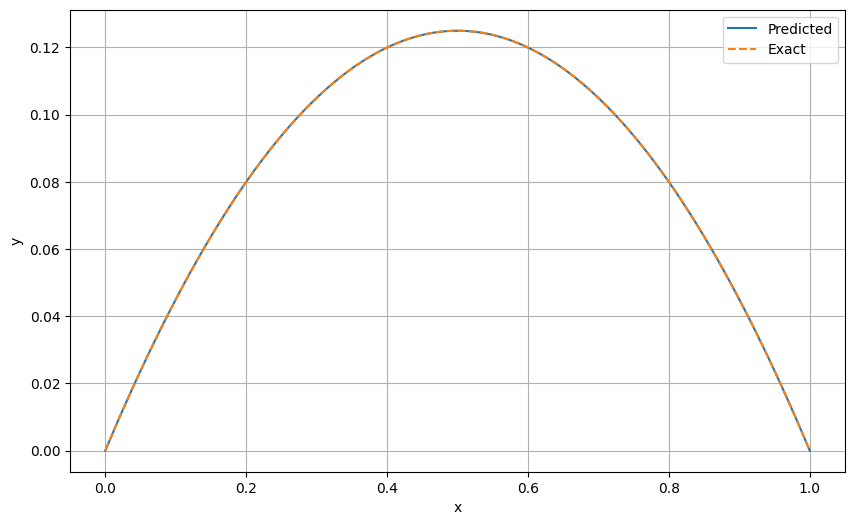

In [22]:
import matplotlib.pyplot as plt

xx = torch.linspace(0, 1, 100)[:, None]
with torch.no_grad():
    yy = N2(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy, label="Predicted")
plt.plot(xx, -0.5*torch.pow(xx, 2) + 0.5*xx, '--', label="Exact")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()